<a href="https://colab.research.google.com/github/bernardo9830/Machine-Learning-projects/blob/main/Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning: Regression and Classification

## Introduction to Machine Learning

Machine Learning is the field of study that gives computers the ability to learn without being explicity programmes.

The two many types of machine learning are
- *supervised learning*
- *unsupervised learning*

### Supervised Learning
*Supervised machine learning* (or *supervised machine learning algorithm*) refers to algorithms that learn x to y or input to output mappings.

The two types of supervised learning are
- *regression* which learns to predict a number from infinitely many possible outputs
- *classification* which learns to predict categories (or class) from small number of possible outputs

### Unsupervised Learning
*Unsupervised machine learning* (or *unsupervised machine learning algorithm*) refers to the algorithms that find patterns between the data which only come with inputs $x$ but not labels $y$.

The three types of unsupervised learning are
- *clustering* which groups similar data points together
- *anomaly detection* which finds unusual data points
- *dimensionality reduction* which compresses data using fewer numbers

## Terminology
- *training set* : set of data used to train the model
- $x$ : *input* variable/*feature*
- $y$ : *output* variable/*target* variable
- $(x, y)$ : single training example
- $f$ : function which represent the model realized through a learning algorithm trained from the training set
- $\hat{y}$ : $(= f(x))$ estimation of the target value $y$

More generally
- $n$ : number of features
- $x_j$ : $j^{th}$ feature
- $m$ : number of examples
- $\vec{x}^{(i)}$ : vector of features of $i^{th}$ example
- $(\vec{x}^{(i)}, y^{(i)})$ : $i^{th}$ training example

Moreover
- $\nabla_{\vec{w}}J:=\frac{\partial J(\vec{w},b)}{\partial \vec{w}}=\left(\frac{\partial J(\vec{w},b)}{\partial w_1},\dots, \frac{\partial J(\vec{w},b)}{\partial w_n}\right)$


## Linear Regression

*Linear regression* fits data points using linear function.

### Univariate linear regression
Let $\vec{x} \in \mathbb{R}^n$ an example of the dataset. The model has the following form
$$
f_{\vec{w},b}(\vec{x})=\vec{w}\cdot \vec{x}+b
$$
where $\vec{w} \in \mathbb{R}^n$ and $b \in \mathbb{R}$ are the parameters that are used to predict $y$.

We want to find $\vec{w},b$ such that the estimated target value $\hat{y}^{(i)}=f_{\vec{w},b}(\vec{x})$ is closed as much as possible to the target value $y^{(i)}$ for all examples $(\vec{x}^{(i)},y^{(i)})$. In order to do this, we compute the error, called *square error* or *cost function*. It is given by
$$
J(\vec{w},b):=\frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})^2,
$$
where $(\hat{y}^{(i)}-y^{(i)})^2$ is the distance between the estimated target value $\hat{y}^{(i)}$ and the real target value $y^{(i)}$ of $i^{th}$ example.

Obviously the goal is to find $\vec{w},b$ that minimize the error, i.e.
$$
\min_{\vec{w},b \in \mathbb{R}^{n+1}} J(\vec{w},b)
$$
which can be done using optimization algorithms such as the *gradient descent*.

### Gradient Descent
The goal of the *gradient descent* is to move for a steepest descedent direction on the loss surface to achieve the minimum with a certain tolerance. The direction of descedent is computed by the partial derivative of the loss function.
The *gradient descent* algorithm works in the following way:

1. *Start with some $\vec{w},b$*: the common choise is to set $\vec{w}=0$ and $b=0$. Another possibility is to sample the parameter according to a uniform distribution in the interval $(-\varepsilon, \varepsilon)$ with $\varepsilon$ sufficiently small.

2. Compute the loss function and update simultaneously the parameters with the following formula:
$$
\begin{align*}
 \vec{w}_{new}&=\vec{w}_{old}-\eta\frac{\partial J(\vec{w}_{old},b_{old})}{\partial \vec{w}}\\
 b_{new}&=b_{old}-\eta\frac{\partial J(\vec{w}_{old},b_{old})}{\partial b}
 \end{align*}
$$
 where $\eta$ is a learning rate(fixed small real number) and measure the step size for the minimum point researcher's.

**Choosing learning rate**


1.   If $\eta$ is too small the alghoritm may converge after a lot of time and more slowly. This is why the step size is very small and can be request a lot of iterations.
2.   If $\eta$ is too big the alghoritm cannot be converge, because we overperform the local minimum due to bigger step size.



### **Logistic regression** ###


Logistic regression is a classification model. Consider the input features vector $X \in \mathbb{R}^{n}$ the model is given by the following formula:
$$
f_{(w,b)}=\sigma(w \cdot X +b)
$$
where $\sigma: \mathbb{R} \to \mathbb{R}$ is the **logistic function** defined as $\sigma(x)=\frac{1}{1+e^{-x}}$.

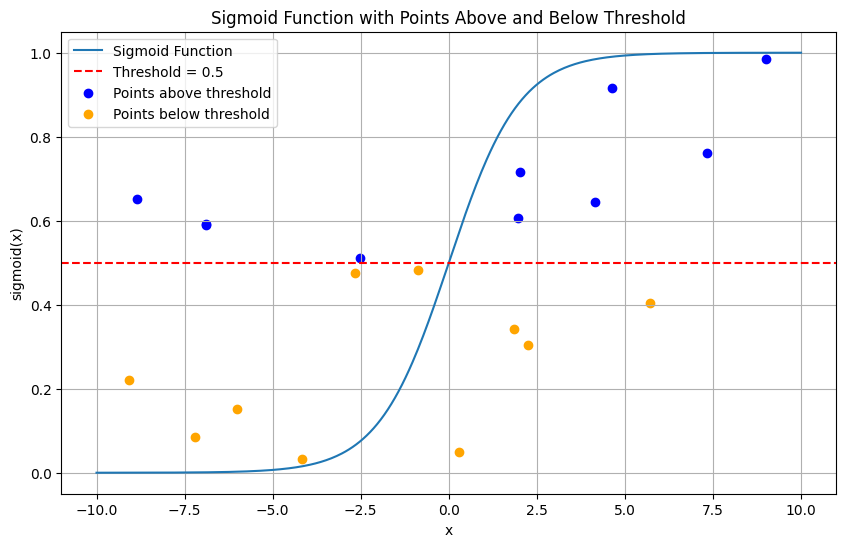

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definire la funzione sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generare i dati per la funzione sigmoide
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

# Definire la soglia
threshold = 0.5

# Generare alcuni punti sopra e sotto la soglia
np.random.seed(42)  # Per la riproducibilità
points_x_above = np.random.uniform(-10, 10, 10)
points_y_above = np.random.uniform(threshold, 1, 10)
points_x_below = np.random.uniform(-10, 10, 10)
points_y_below = np.random.uniform(0, threshold, 10)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold = 0.5')
plt.scatter(points_x_above, points_y_above, color='blue', label='Points above threshold')
plt.scatter(points_x_below, points_y_below, color='orange', label='Points below threshold')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function with Points Above and Below Threshold')
plt.legend()
plt.grid(True)
plt.show()


The shape of the function suggest to use a critical threshold to classify the instances. For example the points above the threshold $0.5$ are classified positive istances. This is because the *hypothesis function* in logistic regression represents the probability of given istance is positive:
$$
f_{\vec{w},b}(\vec{x}):=\mathbb{P}(y=1 \mid \vec{x}, \vec{w}, b)
$$


### **COST FUNCTION OF LOGISTIC REGRESSION**###



The used cost function is called *binary cross entropy* and is given by
$$
J(\vec{w},b)=\frac{1}{m}\sum_{i=1}^m L(f_{\vec{w},b}(\vec{x}^{(i)},y^{(i)}))
$$
where
- $m$ is the number of the training examples
- $x^{i}$ is the $i-th$ training example and $y^{i}$ its target value
- $L(f_{\vec{w},b}(\vec{x}^{(i)},y^{(i)}))$ is the *loss term* of the $i^{th}$ examples which is given by
$$
L(f_{\vec{w},b}(\vec{x}^{(i)},y^{(i)})):= -y^{(i)}\log(f_{\vec{w},b}(\vec{x}^{(i)})-(1-y^{(i)})\log(1-f_{\vec{w},b}(\vec{x}^{(i)}))
$$

This formula is related to the concept of entropy. The entropy of a random variable $X$ is is the average level of "information", "surprise", or "uncertainty" inherent to the variable's possible outcomes.. It is defined as follow:
$$
H(X)=-E(log(p(X)))
$$
and for a discrete distribution $p$ we have
$$
H(X)=-\sum_{x \in \mathcal{X}}p(x)log(p(x))
$$
where $\mathcal{X}$ is the support of $X$

### **Overfitting and Underfitting** ###

The overfitting and underfitting problem are the main problems that affect the development of the model. If the model fits very well data points during the training phase and then in the test phase it works bad, then the model has poorly capable to generalize the relations beetwen data. This is the problem well known as overfitting. There are several cause to this problem:

1) Complexity of the model

2) Poor quality of the data

3) Unbalanced data

What can we do to avoid oferfitting?

1) Adding more training examples

2) Use fewer features (feature selection)

3) Regularization tecnicques

**Regularization**

Regularization techniques in machine learning are methods used to prevent overfitting, which occurs when a model learns not only the underlying patterns in the training data but also the noise. Regularization adds a penalty to the loss function to constrain the model’s complexity, ensuring it generalizes better to unseen data.
If we have a paramters vector $\vec{\theta} \in \mathbb{R}^{n+1}$ the $l_2(\vec{\theta})$ regularization term is defined as:
$$
l_2(\vec{\theta})=\lambda ||\vec{\theta}||^{2}_2
$$
Hence the loss with the regularization term is:
$$
J(\vec{w},b)=\frac{1}{m}\sum_{i=1}^m L(f_{\vec{w},b}(\vec{x}^{(i)},y^{(i)}))+\lambda (\sum_{i=1}^{n}w_{i}^{2} \ + b^{2})
$$
